# TO-DO

* determine lags used
* n-months ahead prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_df = pd.read_csv("forecasting_data.csv")

In [3]:
input_df["Date"] = pd.to_datetime(input_df["Date"])
input_df["PRICE_pc"] = input_df["PRICE"].pct_change()

# Data Exploration

In [4]:
input_df.tail()

,Date,PRICE,EARNY,PE,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,PRICE_pc
399,2023-04-01,4121.47,4.25,23.53,5.073500,4.992500,4.681000,4.016000,3.758000,3.537000,3.502000,3.460000,0.038530
400,2023-05-01,4146.17,4.22,23.67,5.308182,5.266364,4.912727,4.131818,3.820455,3.591364,3.580909,3.573636,0.005993
401,2023-06-01,4345.37,4.03,24.81,5.415714,5.420000,5.241429,4.639524,4.266667,3.949524,3.854762,3.748095,0.048044
402,2023-07-01,4508.08,3.89,25.74,5.488500,5.532000,5.370000,4.828500,4.472000,4.141500,4.029000,3.899500,0.037444
403,2023-08-01,4546.39,3.85,25.95,5.550000,5.530000,5.352857,4.870714,4.545714,4.269286,4.218571,4.141429,0.008498


In [5]:
input_df.isna().sum()

Date        0
PRICE       0
EARNY       0
PE          0
3 MO        0
6 MO        0
1 YR        0
2 YR        0
3 YR        0
5 YR        0
7 YR        0
10 YR       0
PRICE_pc    1
dtype: int64

In [6]:
input_df.describe()

,PRICE,EARNY,PE,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,PRICE_pc
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000
mean,1556.923960,4.604678,24.488688,2.649772,2.782786,2.902619,3.174816,3.373282,3.737389,4.026726,4.248683,0.007108
std,1057.812658,1.221575,13.463060,2.288494,2.321715,2.316221,2.327924,2.278948,2.176189,2.096743,2.003730,0.035685
min,307.120000,0.810000,13.500000,0.011429,0.035500,0.050500,0.115263,0.158095,0.266667,0.461905,0.623636,-0.203911
25%,894.387500,3.845000,18.150000,0.175726,0.312034,0.499761,0.874886,1.272591,1.724988,2.152542,2.533810,-0.007269
50%,1261.155000,4.510000,22.175000,2.208614,2.333039,2.495476,2.855500,3.115000,3.531000,3.799394,4.098512,0.010304
75%,2025.652500,5.510000,25.987500,4.937738,5.073625,5.010238,5.067878,5.244161,5.516148,5.711443,5.805304,0.028462
max,4674.770000,7.410000,123.730000,8.170000,8.280000,8.404500,8.724000,8.782500,8.768000,8.813000,8.893158,0.120217


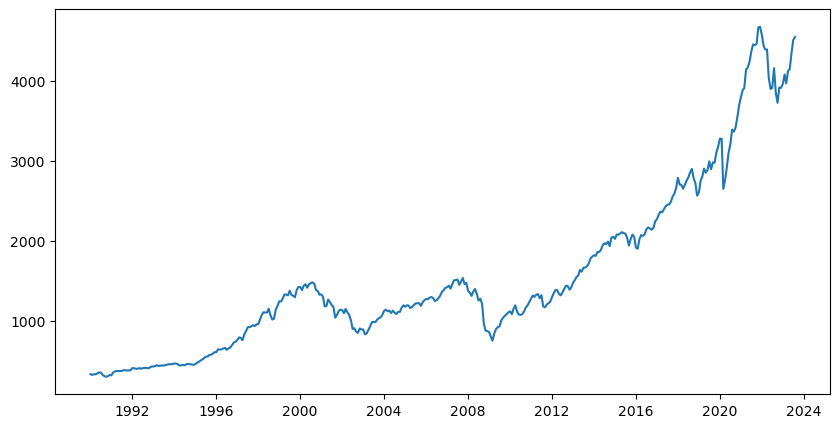

In [7]:
plt_df = input_df.query("Date >= '1990-01-01'")

plt.figure(figsize=(10,5))
plt.plot(plt_df["Date"], plt_df["PRICE"])

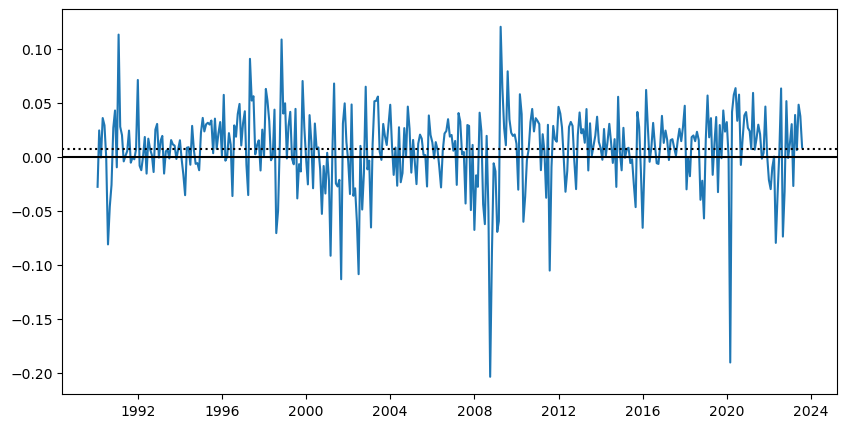

In [8]:
plt.figure(figsize=(10,5))
plt.plot(plt_df["Date"], plt_df["PRICE_pc"])
plt.axhline(y=plt_df["PRICE_pc"].mean(), c="black", ls=":")
plt.axhline(y=0, c="black")

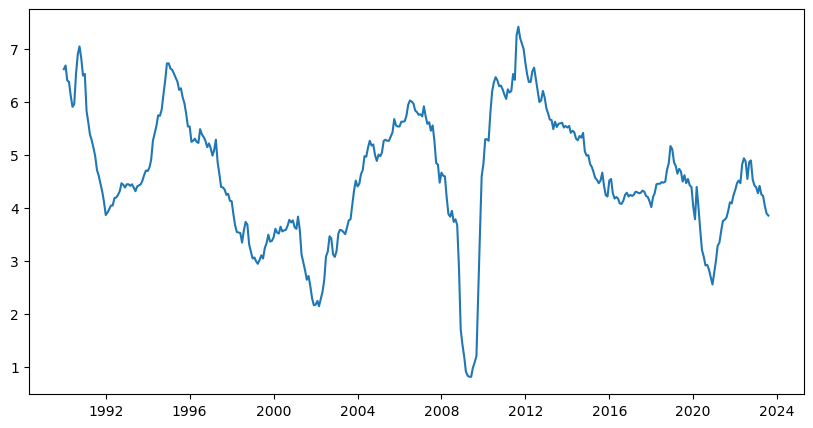

In [9]:
plt.figure(figsize=(10,5))
plt.plot(plt_df["Date"], plt_df["EARNY"])

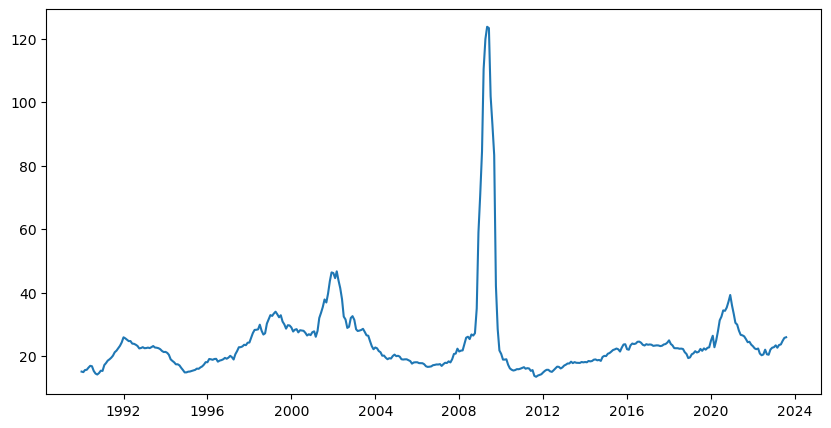

In [10]:
plt.figure(figsize=(10,5))
plt.plot(plt_df["Date"], plt_df["PE"])

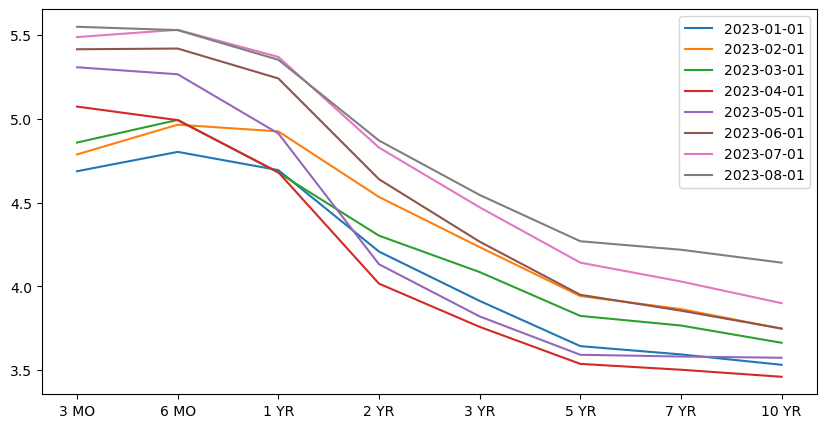

In [31]:
yield_cols = ["3 MO", "6 MO", "1 YR", "2 YR", "3 YR", "5 YR", "7 YR", "10 YR"]

plt.figure(figsize=(10,5))
for date in pd.date_range("2023-01-01", "2023-08-01", freq="MS"):
    plt_df = input_df.query("Date == @date")[yield_cols].T
    plt.plot(range(plt_df.shape[0]), plt_df.values, label=date.strftime("%Y-%m-%d"))
plt.xticks(ticks=range(plt_df.shape[0]), labels=yield_cols)
plt.legend(bbox_to_anchor=(1,1))

In [11]:
input_df.corr(numeric_only=True)

,PRICE,EARNY,PE,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,PRICE_pc
PRICE,1.000000,-0.192445,-0.002164,-0.389671,-0.390693,-0.410307,-0.469610,-0.513681,-0.592478,-0.642032,-0.695514,0.038541
EARNY,-0.192445,1.000000,-0.777915,0.171519,0.173464,0.169021,0.149604,0.139271,0.132695,0.130487,0.152371,-0.006559
PE,-0.002164,-0.777915,1.000000,-0.191687,-0.191325,-0.185210,-0.164481,-0.148664,-0.130346,-0.113857,-0.113499,0.058071
3 MO,-0.389671,0.171519,-0.191687,1.000000,0.998490,0.993534,0.977268,0.960229,0.921444,0.891218,0.853730,0.021620
6 MO,-0.390693,0.173464,-0.191325,0.998490,1.000000,0.997628,0.983510,0.967251,0.928642,0.897903,0.860225,0.011231
1 YR,-0.410307,0.169021,-0.185210,0.993534,0.997628,1.000000,0.992396,0.979698,0.945318,0.916318,0.880232,0.006510
2 YR,-0.469610,0.149604,-0.164481,0.977268,0.983510,0.992396,1.000000,0.996554,0.975679,0.953816,0.923576,0.002128
3 YR,-0.513681,0.139271,-0.148664,0.960229,0.967251,0.979698,0.996554,1.000000,0.990015,0.974146,0.949380,-0.003194
5 YR,-0.592478,0.132695,-0.130346,0.921444,0.928642,0.945318,0.975679,0.990015,1.000000,0.995912,0.982976,-0.011664
7 YR,-0.642032,0.130487,-0.113857,0.891218,0.897903,0.916318,0.953816,0.974146,0.995912,1.000000,0.994947,-0.012714


# Feature Engineering

In [32]:
# lagged values
max_lag = 3
data_df = [input_df.copy()]
for lag in range(1, max_lag+1):
    lagged_df = input_df.shift(lag).drop(["Date"], axis=1)
    lagged_df.columns = lagged_df.columns + f"_l{lag}"
    data_df.append(lagged_df)
data_df = pd.concat(data_df, axis=1).dropna()

In [33]:
# date features
data_df["Month"] = data_df["Date"].dt.month
data_df["Year"] = data_df["Date"].dt.year

In [34]:
# binary target (positive/negative growth)
# zero growth considered negative
y_binary = (data_df["PRICE_pc"] > 0).astype(int)

In [35]:
y_binary.mean()

0.64

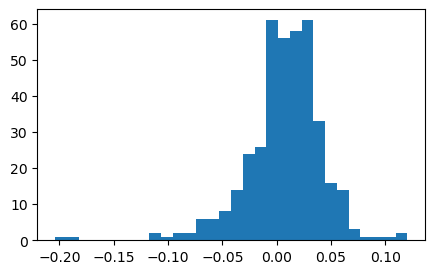

In [36]:
plt.figure(figsize=(5,3))
plt.hist(data_df["PRICE_pc"], bins=30);

In [37]:
# multiple growth categories (quintiles)
y_multi = pd.get_dummies(pd.qcut(data_df["PRICE_pc"], q=5))

In [38]:
# drop contemporaneous features
data_df = data_df.drop(["Date", "PRICE", "EARNY", "PE", "PRICE_pc"], axis=1)

# Train-Test Split, Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
train_n = int(data_df.shape[0] * 0.7)
val_n = train_n + int(data_df.shape[0] * 0.15)
print(train_n, val_n)

280 340


In [41]:
# Train-Validation-Test splits
X_train, X_val, X_test = data_df.iloc[:train_n], data_df.iloc[train_n:val_n], data_df.iloc[val_n:]
y_train_bin, y_val_bin, y_test_bin = y_binary.iloc[:train_n], y_binary.iloc[train_n:val_n], y_binary.iloc[val_n:]
y_train_mul, y_val_mul, y_test_mul = y_multi.iloc[:train_n], y_multi.iloc[train_n:val_n], y_multi.iloc[val_n:]

In [42]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model Fitting

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# params = {""}

In [44]:
model_RF_bin = RandomForestClassifier()
model_RF_bin.fit(X_train, y_train_bin)

model_RF_mul = RandomForestClassifier()
model_RF_mul.fit(X_train, y_train_mul)

RandomForestClassifier()

In [45]:
y_val_preds_bin = model_RF_bin.predict(X_val)
y_test_preds_bin = model_RF_bin.predict(X_test)
y_val_preds_mul = model_RF_mul.predict(X_val)
y_test_preds_mul = model_RF_mul.predict(X_test)

# Model Evalution - Binary

In [50]:
from sklearn.metrics import (roc_auc_score, 
                             accuracy_score, 
                             precision_score, recall_score, 
                             precision_recall_fscore_support,
                             confusion_matrix)

In [47]:
def print_scores(y_test, pred):
    print(f'AUC: {roc_auc_score(y_test, pred)}')
    print(f'Accuracy: {accuracy_score(y_test, pred)}')
    print(f'Precision: {precision_score(y_test, pred)}')
    print(f'Recall: {recall_score(y_test, pred)}')

In [48]:
print_scores(y_val_preds_bin, y_val_bin)

AUC: 0.5625
Accuracy: 0.55
Precision: 0.5121951219512195
Recall: 0.75


In [52]:
# rows: actual vs. cols: prediction
confusion_matrix(y_val_bin, y_val_preds_bin)

array([[12,  7],
       [20, 21]], dtype=int64)

In [49]:
print_scores(y_test_preds_bin, y_test_bin)

AUC: 0.49122807017543857
Accuracy: 0.3333333333333333
Precision: 0.04878048780487805
Recall: 0.6666666666666666


In [53]:
confusion_matrix(y_test_bin, y_test_preds_bin)

array([[18,  1],
       [39,  2]], dtype=int64)